<h2 align="center">"When communicating results to nontechnical types, there is nothing better than a clear visualization to make your point."</h2>
<h3 align="center">—John Tukey</h3>

# Challenge: Factors that affect life expectancy


Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who/home) from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'lifeexpectancy'<br>
table_name = 'lifeexpectancy'<br>

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

* Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

* First, load the dataset.

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import sklearn.preprocessing as pref
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#provided login values
user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'lifeexpectancy'
table_name = 'lifeexpectancy'
dialect = 'postgresql'

In [3]:
engine = create_engine(f'{dialect}://{user}:{pw}@{host}:{port}/{db}')
sql_q = '''
SELECT
    *
FROM
{}

'''.format(table_name)
life_expect = pd.read_sql_query(sql_q, con=engine)
engine.dispose()

In [4]:
life_expect_df = life_expect.copy() #allow reset w/o repulling data

In [5]:
life_expect_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
life_expect_df.columns = life_expect_df.columns.to_series().replace(' ', '_', regex=True)
life_expect_df.columns = life_expect_df.columns.to_series().replace('^_', '', regex=True)
life_expect_df.columns = life_expect_df.columns.to_series().replace('_$', '', regex=True)
life_expect_df.columns = life_expect_df.columns.to_series().replace('[-/]', '_', regex=True)

life_expect_df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness__1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [7]:
# fix datatypes
life_expect_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV_AIDS                           float64
GDP                                float64
Population                         float64
thinness__1_19_years               float64
thinness_5_9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

In [8]:
life_expect_df = pd.concat((life_expect_df, pd.get_dummies(life_expect_df["Status"])), axis=1)
life_expect_df.drop(["Developing"], axis=1, inplace=True)
life_expect_df = life_expect_df.drop(["Status"], axis=1)

## Remove Nulls

In [9]:
life_expect_df.shape

(2938, 22)

In [10]:
life_expect_df.isnull().sum()

Country                              0
Year                                 0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
Developed                            0
dtype: int64

In [11]:
# use linear interpolation to fill in blanks
life_expect_df = life_expect_df.sort_values(by="Year", ascending=True).groupby("Country")\
.apply(lambda x: x.interpolate()).reset_index()

In [12]:
life_expect_df.isnull().sum()

index                                0
Country                              0
Year                                 0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                             17
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                   47
Diphtheria                          19
HIV_AIDS                             0
GDP                                431
Population                         648
thinness__1_19_years                34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
Developed                            0
dtype: int64

In [13]:
life_expect_df.dropna(axis=0, how='any', subset=['Life_expectancy'], inplace=True) #target shouldn't be na 

In [14]:
#fill with country means
for column in life_expect_df:
    try:
        life_expect_df[column] = life_expect_df.groupby('Country')[column].apply(lambda x: x.fillna(x.mean()))
    except: pass

In [15]:
life_expect_df.isnull().sum()

index                                0
Country                              0
Year                                 0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                             16
percentage_expenditure               0
Hepatitis_B                        144
Measles                              0
BMI                                 32
under_five_deaths                    0
Polio                                0
Total_expenditure                   32
Diphtheria                           0
HIV_AIDS                             0
GDP                                400
Population                         640
thinness__1_19_years                32
thinness_5_9_years                  32
Income_composition_of_resources    160
Schooling                          160
Developed                            0
dtype: int64

In [16]:
#check if nulls are concentrated by country
life_expect_df[life_expect_df.isnull().any(axis=1)][["Country"]].groupby("Country").size()

Country
Antigua and Barbuda                                     16
Bahamas                                                 16
Bahrain                                                 16
Barbados                                                16
Bolivia (Plurinational State of)                        16
Brunei Darussalam                                       16
Congo                                                   16
Cuba                                                    16
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Denmark                                                 16
Egypt                                                   16
Finland                                                 16
Gambia                                                  16
Grenada                                         

In [17]:
#drop feature with lots of nulls and unlikely to be important
life_expect_df = life_expect_df.drop(["Population"], axis=1)

In [18]:
life_expect_df[life_expect_df.isnull().any(axis=1)][["Country"]].groupby("Country").size()

Country
Bahamas                                                 16
Bolivia (Plurinational State of)                        16
Congo                                                   16
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Denmark                                                 16
Egypt                                                   16
Finland                                                 16
Gambia                                                  16
Hungary                                                 16
Iceland                                                 16
Iran (Islamic Republic of)                              16
Japan                                                   16
Kyrgyzstan                                              16
Lao People's Democratic Republic                

In [19]:
#see if nulls are all on a few rows which could be dropped
life_expect_df.isnull().sum(axis=1).value_counts()

0    2352
1     384
3     144
4      48
dtype: int64

In [20]:
for column in life_expect_df.select_dtypes(include=np.number):
    life_expect_df[column].fillna(life_expect_df[column].median(), inplace=True)

In [21]:
life_expect_df.isnull().sum(axis=1).value_counts()

0    2928
dtype: int64

## Deal with Outliers

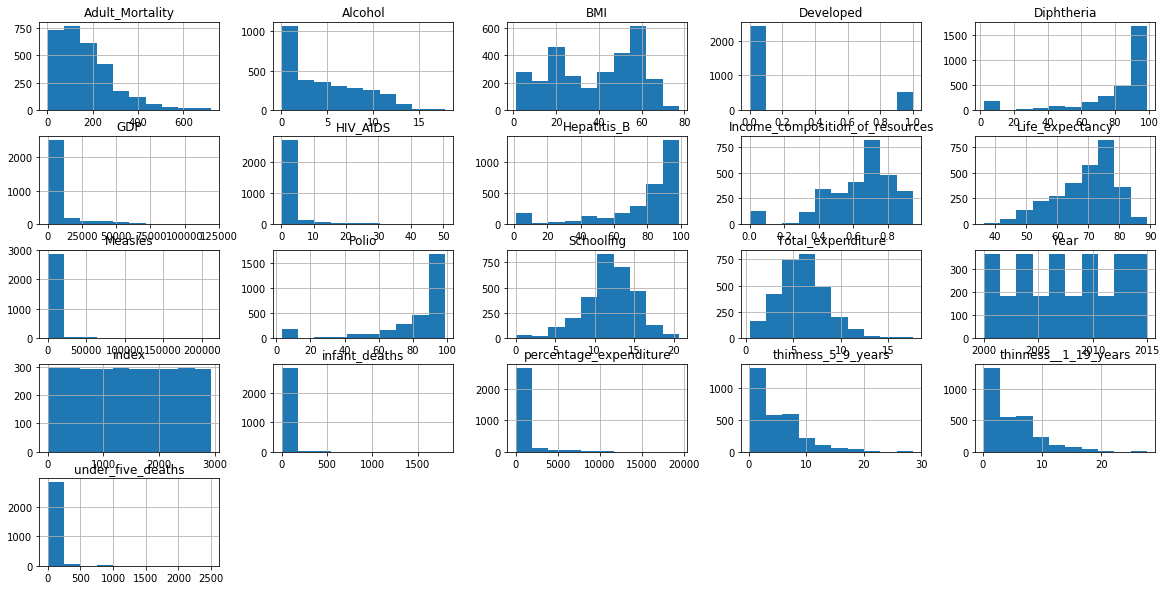

In [22]:
life_expect_df.hist(figsize=(20,10));

In [23]:
life_expect_df[life_expect_df["percentage_expenditure"] > 50].shape

(1595, 22)

In [24]:
life = life_expect_df.drop(["percentage_expenditure"], axis=1) #half the values are >50%!!

In [25]:
life_expect_df[["Country", "infant_deaths"]].sort_values(by=["infant_deaths"], ascending=False).head(20)

,Country,infant_deaths
291,India,1800
180,India,1800
419,India,1700
673,India,1700
788,India,1600
920,India,1500
1269,India,1500
1398,India,1400
1772,India,1300
1635,India,1300


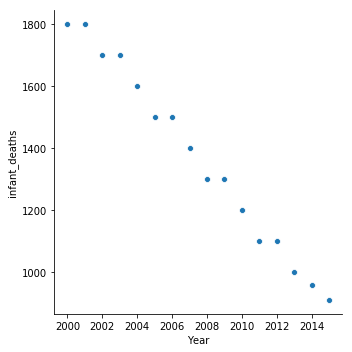

In [26]:
sns.relplot(data=life_expect_df[life_expect_df['Country'] == 'India'], x='Year', y='infant_deaths', );

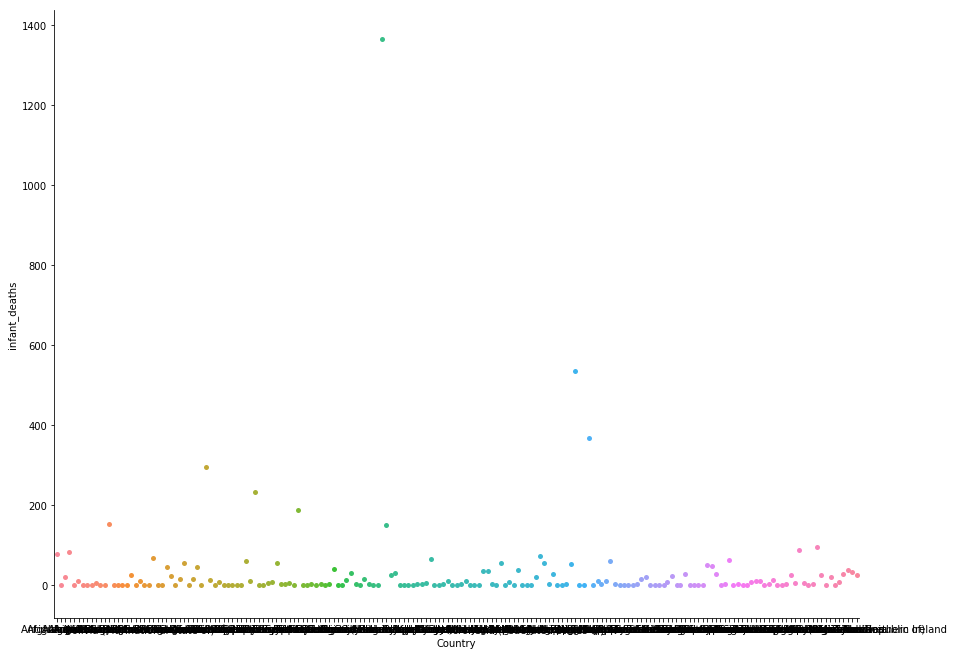

In [27]:
infant_deaths_sum_df = life_expect_df.groupby("Country")[["Country", "infant_deaths"]].mean().reset_index()
g = sns.catplot(data=infant_deaths_sum_df, x='Country', y='infant_deaths')
g.fig.set_size_inches(23,10);

In [28]:
life_expect_df[life_expect_df["infant_deaths"] > 150].groupby("Country").mean() #most per year should be 1/6 of pop

,index,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,Developed
Country,,,,,,,,,,,,,,,,,,,,,
Bangladesh,204.5,2003.5,67.012500,160.250000,191.2500,0.010000,21.729795,59.355769,7732.000000,9.625000,...,79.1250,2.600000,89.6250,0.100000,261.582979,8.950000,9.550000,0.487000,7.962500,0
China,567.5,2007.5,74.262500,73.750000,294.8750,4.281875,73.583763,80.437500,65857.937500,21.806250,...,93.6875,4.957500,93.3125,0.100000,2345.303158,4.637500,4.025000,0.660250,11.437500,0
Democratic Republic of the Congo,728.5,2007.5,55.687500,265.375000,234.5000,1.335625,0.000000,51.333333,48922.687500,15.837500,...,55.6250,3.606875,41.8750,1.818750,1718.717086,8.143750,7.956250,0.677000,12.300000,0
Ethiopia,892.5,2005.5,57.483333,302.666667,202.7500,1.034167,27.884741,60.898148,1924.166667,14.066667,...,54.5000,4.806667,37.0000,3.358333,208.515694,10.658333,8.183333,0.317750,6.266667,0
India,1194.5,2007.5,65.418750,146.562500,1366.6875,2.012500,33.242621,35.000000,46454.187500,14.793750,...,69.6250,4.379375,67.0625,0.256250,837.920051,27.100000,27.943750,0.549500,9.981250,0
Indonesia,1214.5,2003.5,66.712500,149.500000,171.1250,0.057500,40.552846,65.625000,16377.500000,15.625000,...,59.7500,2.522500,64.6250,0.112500,826.093911,5.287500,6.462500,0.618125,10.837500,0
Nigeria,1901.5,2007.5,51.356250,248.500000,535.6875,8.106875,85.444275,42.909091,51653.937500,19.750000,...,41.3125,3.708125,39.3125,4.831250,1360.139877,10.418750,10.368750,0.367375,9.000000,0
Pakistan,1950.5,2007.5,64.500000,154.000000,367.9375,0.025000,26.120391,67.307692,3842.312500,18.312500,...,64.1875,2.885625,70.8750,0.100000,666.111052,15.087500,15.512500,0.500875,6.718750,0


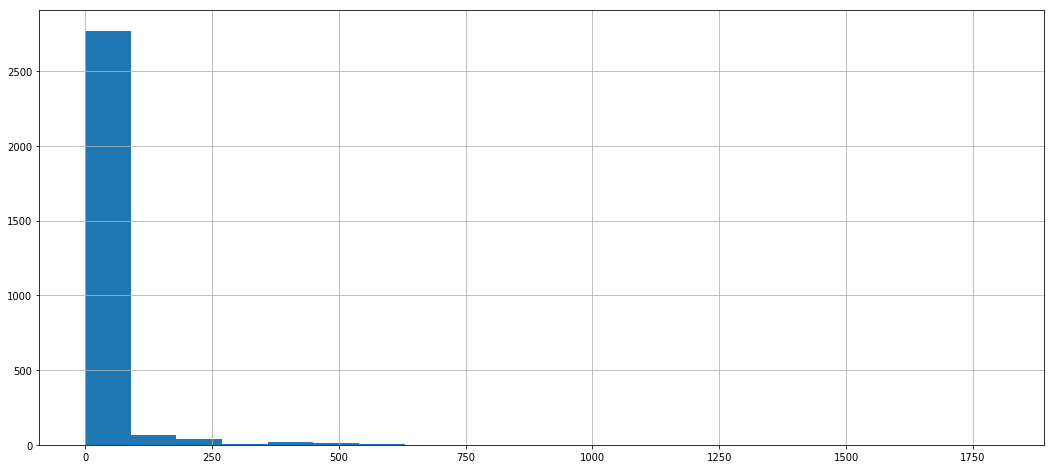

In [29]:
life_expect_df.infant_deaths.hist(figsize=(18,8), bins=20)

In [30]:
#get winsorize fnct
%run "C:\Users\Chris\Documents\thinkful\thinkful_notes\utility\numerical.py"

In [31]:
%cd ..

C:\Users\Chris\Documents\thinkful\thinkful_notes


In [32]:
who

PCA	 StandardScaler	 column	 create_engine	 db	 dialect	 engine	 g	 host	 
infant_deaths_sum_df	 life	 life_expect	 life_expect_df	 np	 pd	 plt	 port	 pref	 
pw	 sns	 sql_q	 table_name	 user	 winsorize	 


In [33]:
life_expect_df.infant_deaths = winsorize(life_expect_df.infant_deaths)
life_expect_df.under_five_deaths = winsorize(life_expect_df.under_five_deaths)
life_expect_df.Measles = winsorize(life_expect_df.Measles)

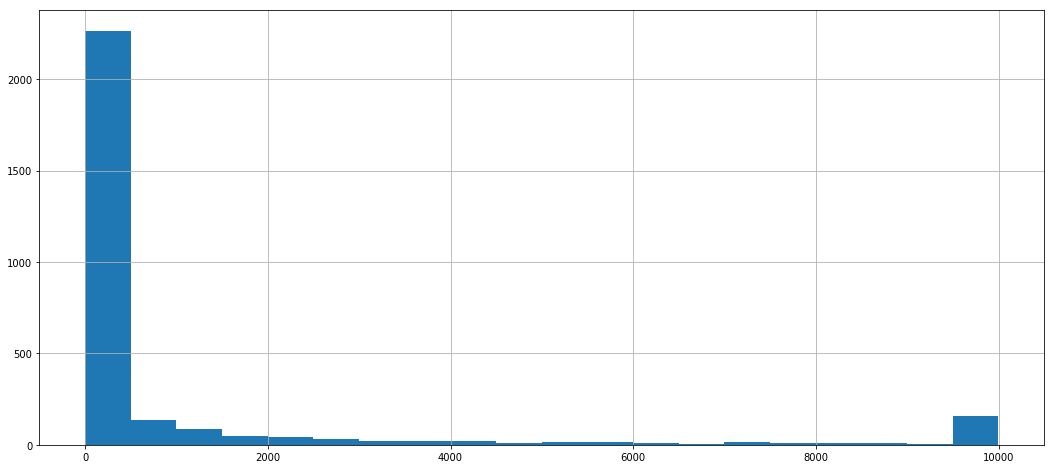

In [34]:
life_expect_df.Measles.hist(figsize=(18,8), bins=20)

### Correlations with Target

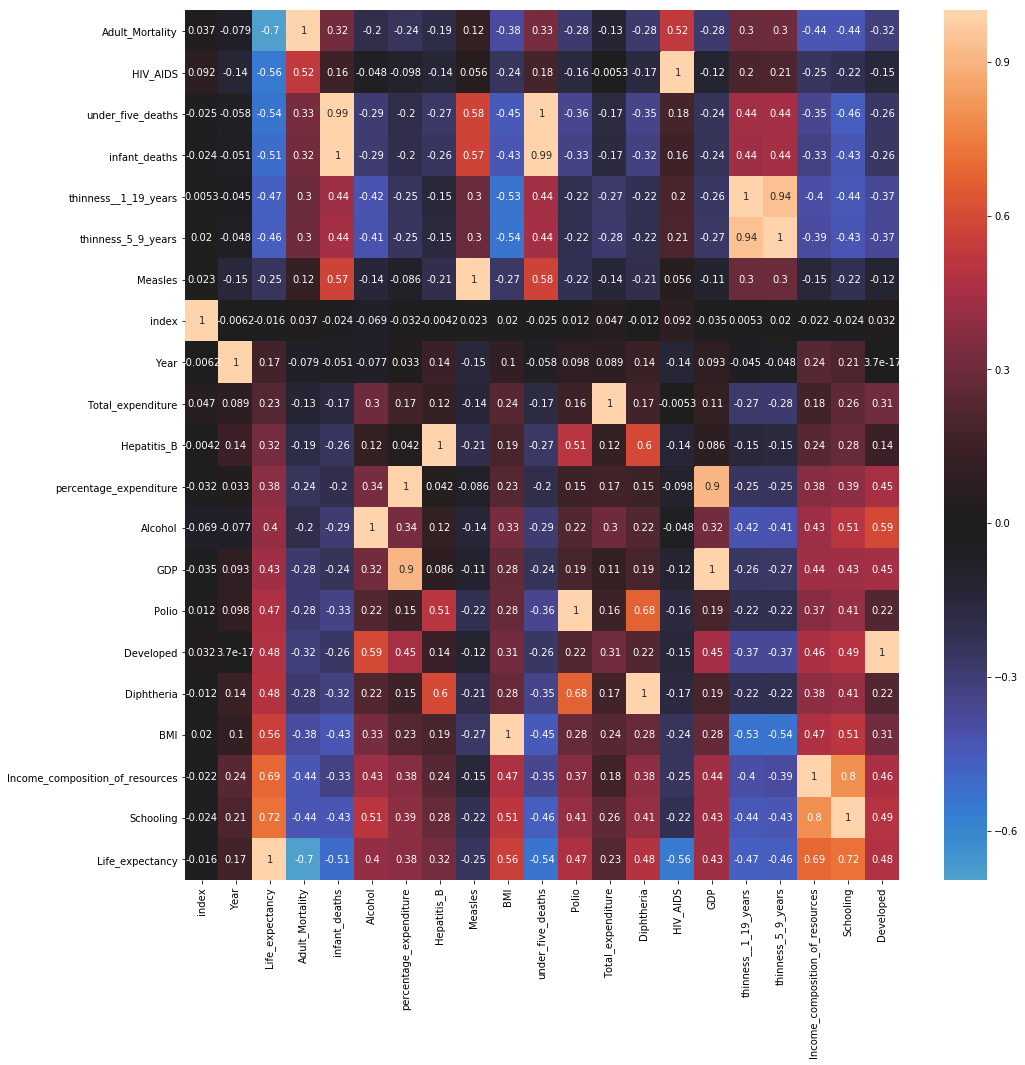

In [35]:
plt.figure(figsize=(16,16))
sns.heatmap(life_expect_df.corr().sort_values(by="Life_expectancy"), center=0, annot=True);

The biggest correlation are with Adult Mortality (this is corr of 1...perhaps same value transformed?), Schooling, Income Comp of resources, BMI, Adult Mortality, HIV/Aids, under 5 deaths, and infant deaths.


In [36]:
#corr of 1...
life_expect_df.drop(["Adult_Mortality"], axis=1, inplace=True)

### PCA

In [37]:
life_expect_df.drop(["index"], axis=1, inplace=True)
life_expect_df.set_index(["Country", "Year"], inplace=True)

In [38]:
life_expect_df.shape

(2928, 18)

In [39]:
life_expect_df.head(2)

,,Life_expectancy,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,Developed
Country,Year,,,,,,,,,,,,,,,,,,
Zimbabwe,2000,46.0,24.0,1.68,0.000000,79.000000,1483.0,25.5,39.0,78.0,7.10,78.0,43.5,547.358878,11.0,11.2,0.434,9.8,0
Mozambique,2000,49.0,93.0,1.14,47.172507,67.866667,7375.0,16.5,136.0,69.0,6.16,7.0,12.2,277.648659,4.2,4.1,0.291,5.4,0


In [40]:
#standardize features
Xstd = StandardScaler().fit_transform(life_expect_df.iloc[:,1:17])
Y = life_expect_df.loc["Life_expectancy"]
Xstd.shape

KeyError: 'Life_expectancy'

In [41]:
#covariance
covariance_matrix = np.cov(Xstd.T)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [42]:
pca = PCA()
pca.fit_transform(life_expect_df)
print(pca.explained_variance_ratio_)

[9.62278653e-01 3.38391811e-02 3.86358873e-03 9.03423547e-06
 4.87744164e-06 1.65104504e-06 1.47601132e-06 9.12892778e-07
 2.72599875e-07 1.35345704e-07 8.45418445e-08 5.20249821e-08
 2.85760096e-08 2.66396741e-08 1.89274712e-08 6.27268319e-09
 3.94064956e-10 7.03816719e-11]


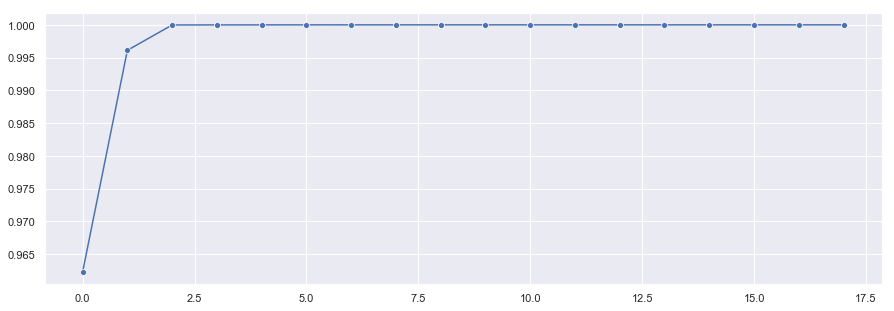

In [43]:
sns.set_style('dark')
sns.set()
plt.figure(figsize=(15,5))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_), marker="o");

In [45]:
# PCA components

# Dimension indexing
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
components_df = pd.DataFrame(np.round(pca.components_, 4), columns = life_expect_df.keys()) 
components_df.index = dimensions
components_df.head()

,Life_expectancy,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,Developed
Dimension 1,0.0003,-0.0005,0.0001,0.1340,0.0002,-0.0215,0.0004,-0.0007,0.0003,0.0000,0.0003,-0.0000,0.9907,-0.0001,-0.0001,0.0000,0.0001,0.0000
Dimension 2,-0.0008,0.0057,-0.0002,0.0150,-0.0020,0.9996,-0.0019,0.0085,-0.0019,-0.0001,-0.0018,0.0001,0.0196,0.0005,0.0005,-0.0000,-0.0002,-0.0000
Dimension 3,0.0002,-0.0005,-0.0006,-0.9909,0.0022,0.0122,0.0009,-0.0009,0.0015,-0.0005,0.0013,-0.0002,0.1343,0.0002,0.0002,0.0000,0.0000,-0.0001
Dimension 4,-0.1216,0.4442,-0.0240,-0.0026,-0.2932,-0.0104,-0.1956,0.6649,-0.3203,-0.0094,-0.3374,0.0268,0.0012,0.0341,0.0352,-0.0018,-0.0337,-0.0018
Dimension 5,-0.0254,-0.3264,0.0003,-0.0018,-0.5191,0.0031,0.0327,-0.4554,-0.4288,-0.0049,-0.4802,0.0061,0.0002,-0.0130,-0.0141,-0.0007,-0.0077,-0.0004


In [46]:
#get usable dimensions
components_stack_df = pd.DataFrame(components_df.iloc[0:3,:].stack()).reset_index().rename(index=str, columns={"level_0":'dimension', "level_1":'feature', 0:'weight'})

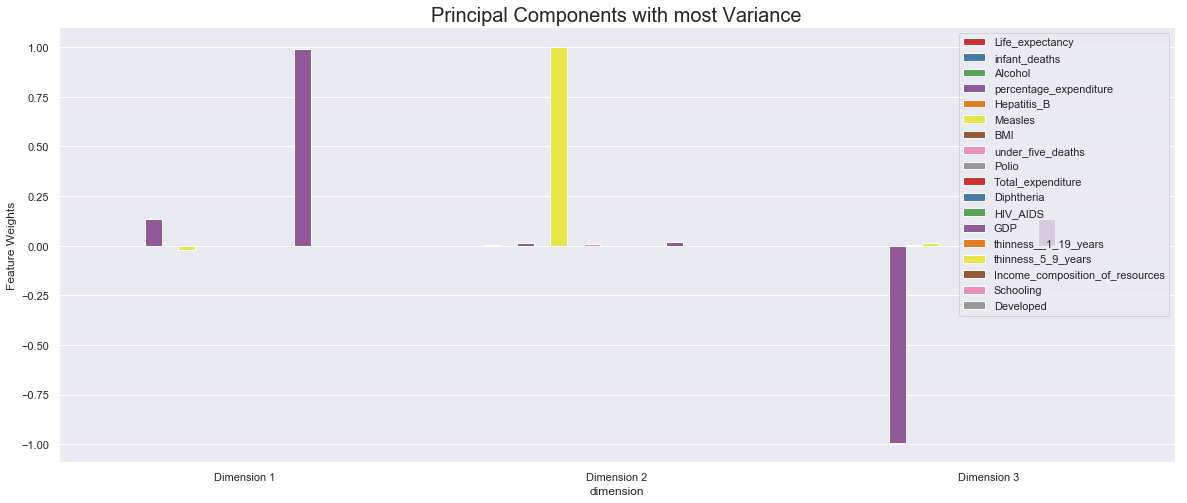

In [47]:
# Plot the feature weights as a function of the components
fig, ax = plt.subplots(figsize = (20,8))
ax = sns.barplot(data=components_stack_df, x='dimension', y='weight', hue='feature', palette="Set1")
ax.set_ylabel("Feature Weights") 
ax.set_xticklabels(dimensions, rotation=0)
plt.legend(loc="upper right")
plt.title("Principal Components with most Variance", size=20);

These three dimensions, derived from the PCA, contain almost all the variance, and are loaded mostly from percentage_expenditures, GDP, and Measles. 